In [64]:
 from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import os
import seaborn as sns
import plotly.express as px

data_dir = 'c:\\Users\\Acer\\Downloads\\'
files = os.listdir(data_dir)
files=data_dir+'housing.csv'
data=pd.read_csv(files)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [65]:
train,test=train_test_split(data,test_size=0.2,random_state=42)
train,val=train_test_split(train,test_size=0.25,random_state=42)

In [66]:
train.info()
test.info()
val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 231 to 26
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             327 non-null    int64 
 1   area              327 non-null    int64 
 2   bedrooms          327 non-null    int64 
 3   bathrooms         327 non-null    int64 
 4   stories           327 non-null    int64 
 5   mainroad          327 non-null    object
 6   guestroom         327 non-null    object
 7   basement          327 non-null    object
 8   hotwaterheating   327 non-null    object
 9   airconditioning   327 non-null    object
 10  parking           327 non-null    int64 
 11  prefarea          327 non-null    object
 12  furnishingstatus  327 non-null    object
dtypes: int64(6), object(7)
memory usage: 35.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 316 to 155
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  -----

In [67]:
numerical=data.select_dtypes(include=np.number).columns.tolist()
catagorical=data.select_dtypes(include='object').columns.tolist()
numerical

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [68]:
numerical=list(data[numerical].columns)[1:-1]
target_col = 'price'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(train[numerical])
scaled_data = model.transform(train[numerical])

In [69]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(data[catagorical])
train[numerical]

,area,bedrooms,bathrooms,stories
231,4320,3,1,1
27,8875,3,1,1
412,2610,3,1,2
393,7424,3,1,1
59,6000,3,2,4
...,...,...,...,...
261,3510,3,1,2
108,3240,4,1,3
142,10500,4,2,2
513,4400,3,1,2


In [70]:
data[catagorical]
encoder.categories_

[array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)]

In [71]:
encoded_cols = list(encoder.get_feature_names_out(catagorical))

In [72]:
train[encoded_cols] = encoder.transform(train[catagorical])
test[encoded_cols] = encoder.transform(test[catagorical])
val[encoded_cols] = encoder.transform(val[catagorical])

In [73]:
train_inputs = list(train.columns)[1:-1]
target_train = 'price'
test_inputs = list(test.columns)[1:-1]
target_test = 'price'
val_inputs = list(val.columns)[1:-1]
target_val = 'price'

In [74]:
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()
scalar.fit(data[numerical])



MinMaxScaler()

In [75]:
train[numerical]=scalar.transform(train[numerical])
test[numerical]=scalar.transform(test[numerical])
val[numerical]=scalar.transform(val[numerical])
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train[numerical+encoded_cols],train[target_col])
y=train[numerical+encoded_cols]
pred=reg.predict(y)

In [76]:
train[numerical]

,area,bedrooms,bathrooms,stories
231,0.183505,0.4,0.000000,0.000000
27,0.496564,0.4,0.000000,0.000000
412,0.065979,0.4,0.000000,0.333333
393,0.396838,0.4,0.000000,0.000000
59,0.298969,0.4,0.333333,1.000000
...,...,...,...,...
261,0.127835,0.4,0.000000,0.333333
108,0.109278,0.6,0.000000,0.666667
142,0.608247,0.6,0.333333,0.333333
513,0.189003,0.4,0.000000,0.333333


In [77]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
reg = LinearRegression()
reg.fit(train[numerical+encoded_cols],train[target_col])

LinearRegression()

In [78]:
pred=reg.predict(train[numerical+encoded_cols])

In [79]:
from sklearn.metrics import mean_squared_error
train_rmse = mean_squared_error(train[target_col], pred, squared=False)
print(train_rmse)

996286.6872763542


In [80]:
 from sklearn.metrics import accuracy_score 
def try_models(model):
    model.fit(train[numerical+encoded_cols], train[target_col])
    train_preds = model.predict(train[numerical+encoded_cols])
    test_preds = model.predict(test[numerical+encoded_cols])
    val_preds = model.predict(val[numerical+encoded_cols])
    
    # Compute RMSE
    train_rmse = mean_squared_error(train[target_col], train_preds, squared=False)
    val_rmse = mean_squared_error(val[target_col], val_preds, squared=False)
    test_rmse = mean_squared_error(test[target_col], test_preds, squared=False)
    return train_rmse, val_rmse,test_rmse

In [81]:
try_models(LinearRegression())

(996286.6872763542, 1018414.8448218533, 1361209.454142246)

In [82]:
try_models(Lasso())

(996286.6873298648, 1018414.0507554077, 1361211.6128173834)

In [83]:
try_models(ElasticNet())

(1423728.9717683494, 1355717.6760271902, 1881052.5935933513)

In [84]:
try_models(SGDRegressor())

(1016981.0881559012, 1033702.269160202, 1369773.7439233928)

In [85]:
try_models(Ridge())

(1000033.7149987804, 1018300.4753590563, 1365253.6172114115)

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

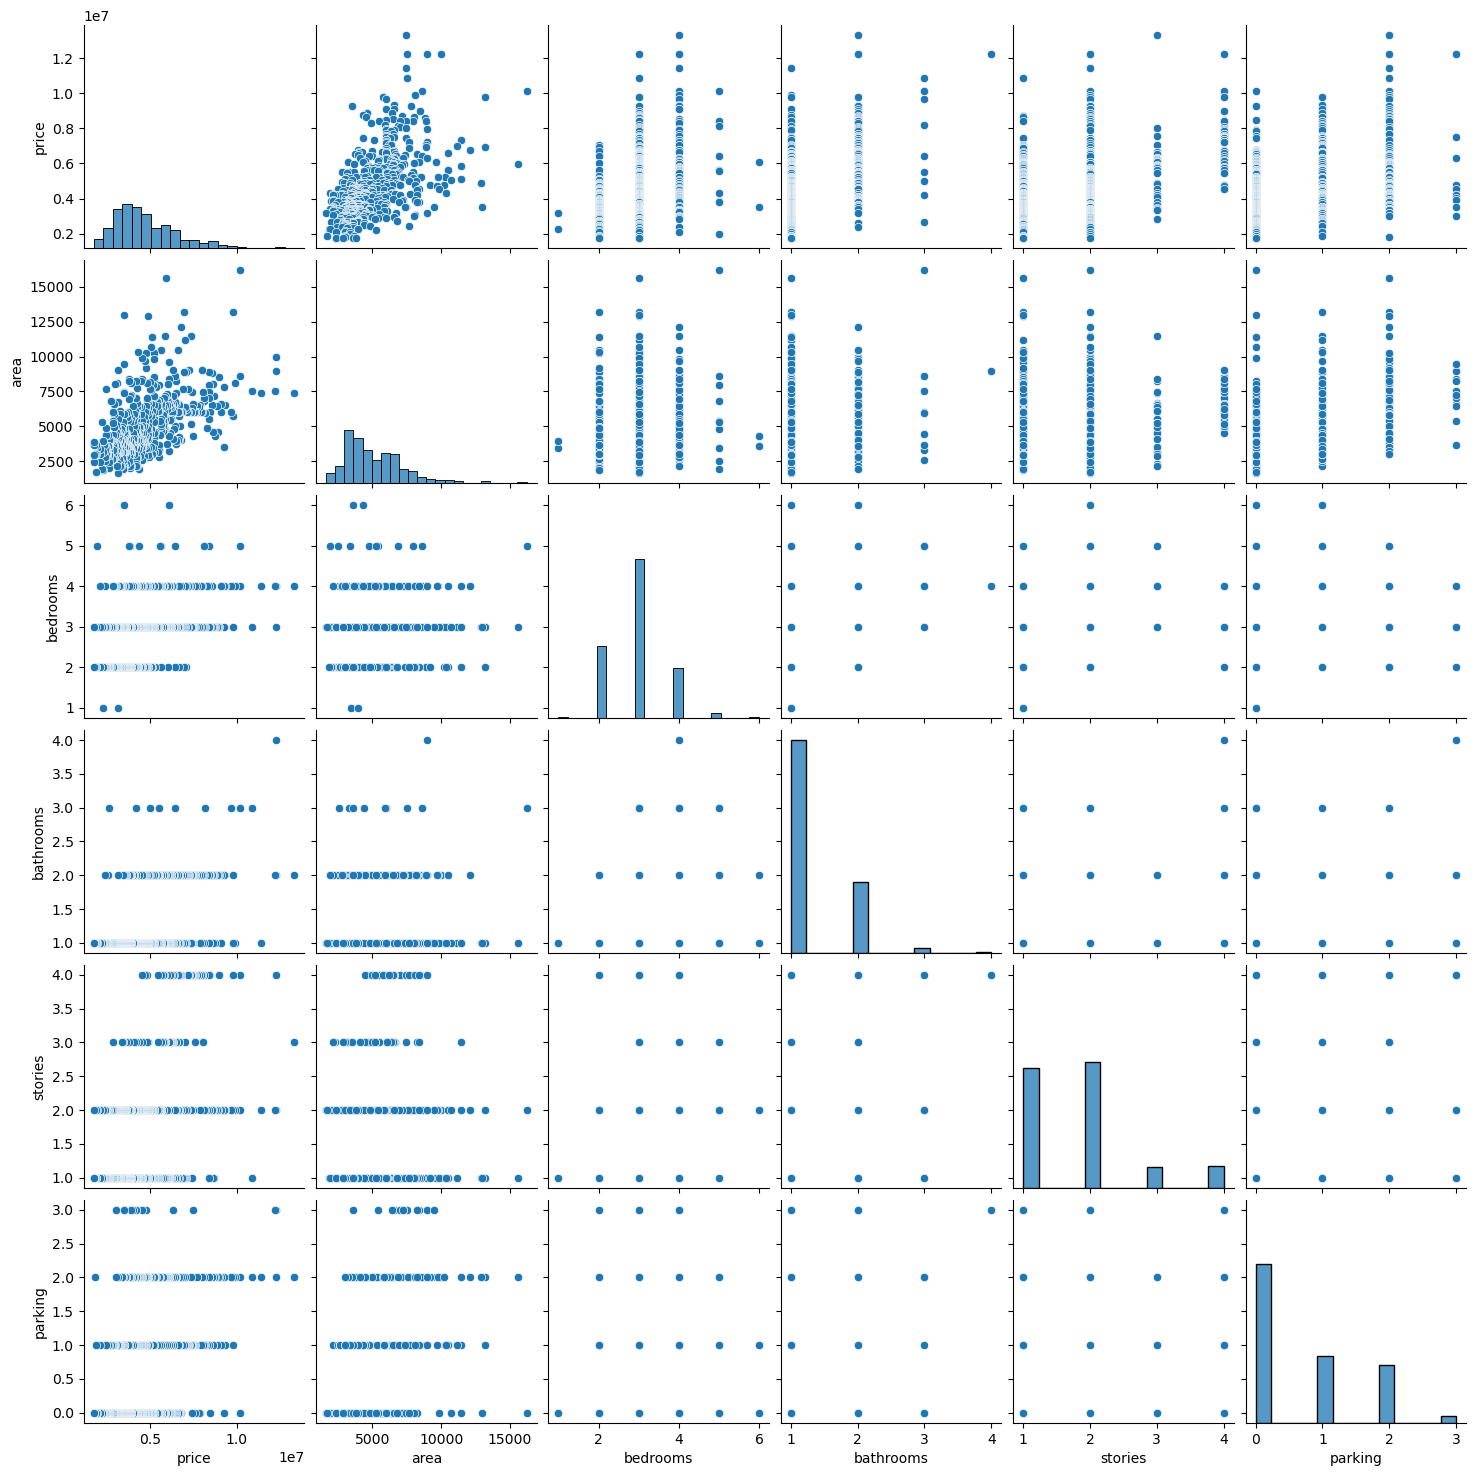

In [86]:
sns.pairplot(data)
plt.show()

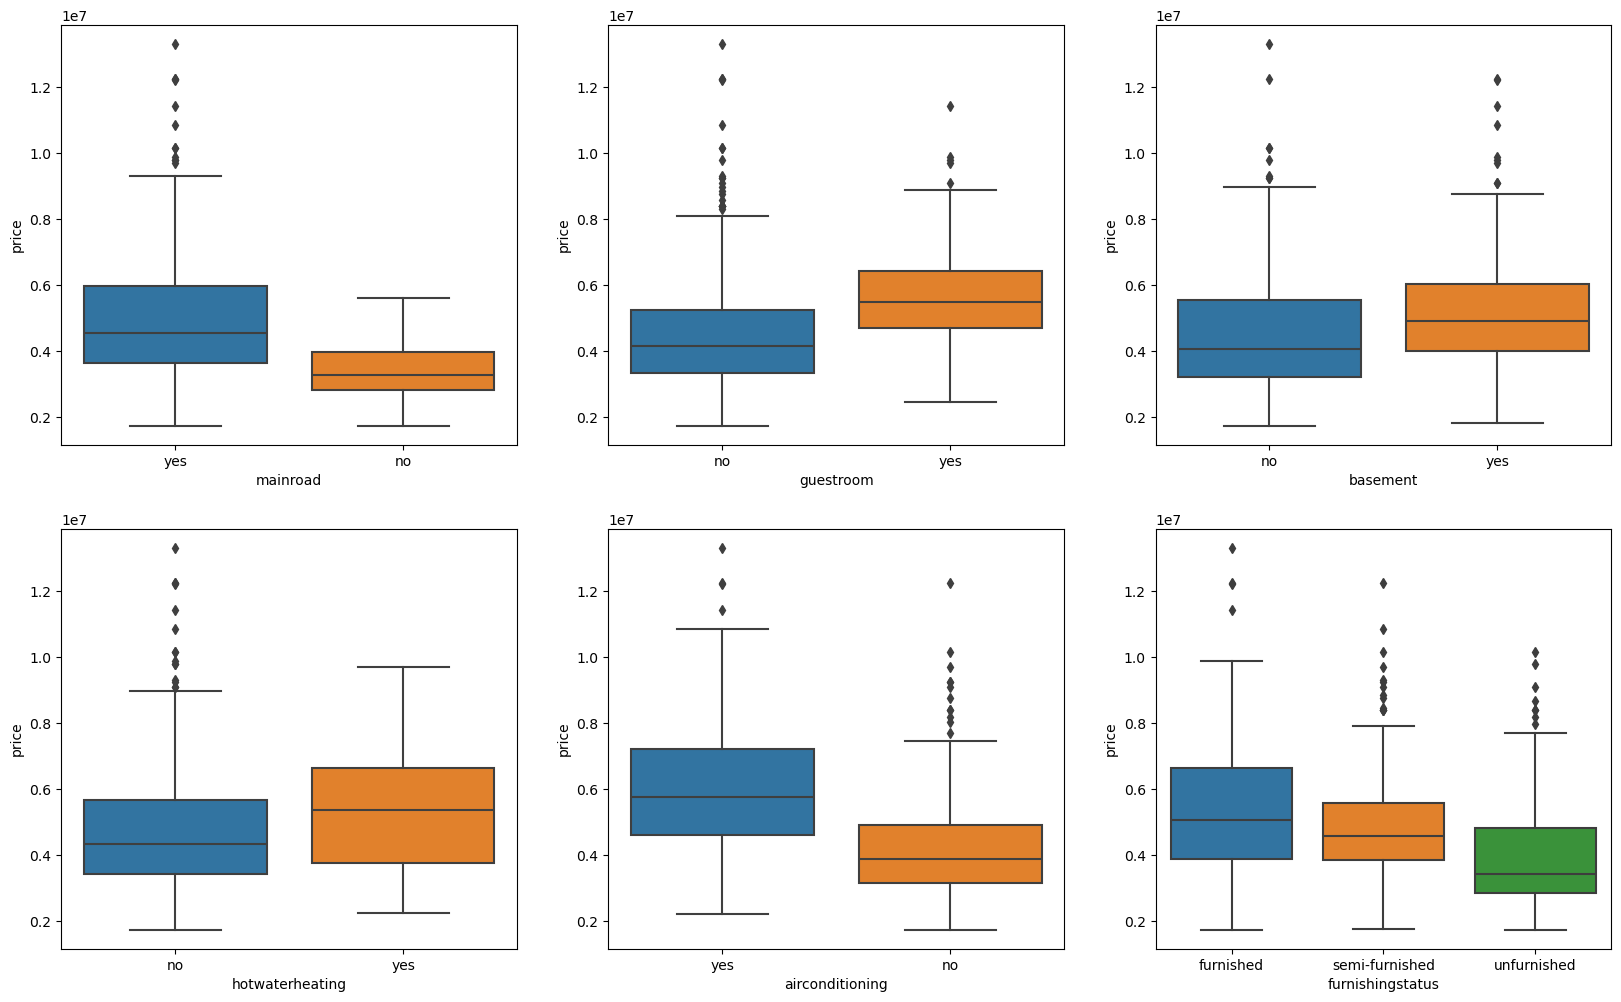

In [87]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = data)
plt.show()

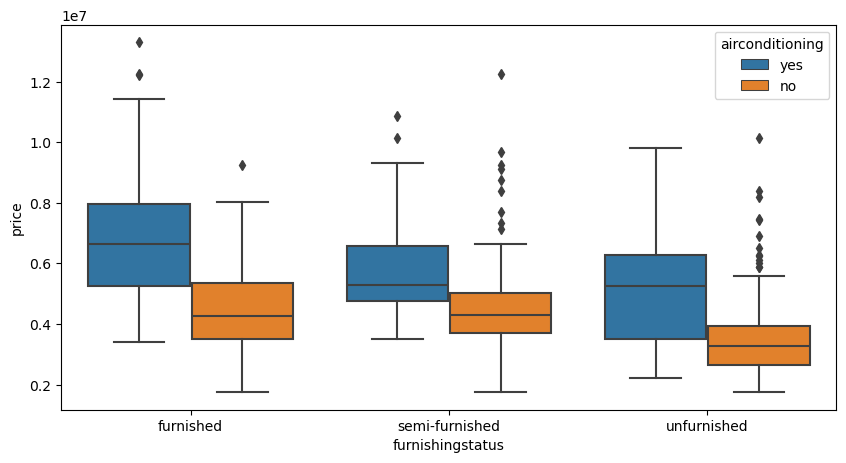

In [88]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data)
plt.show()

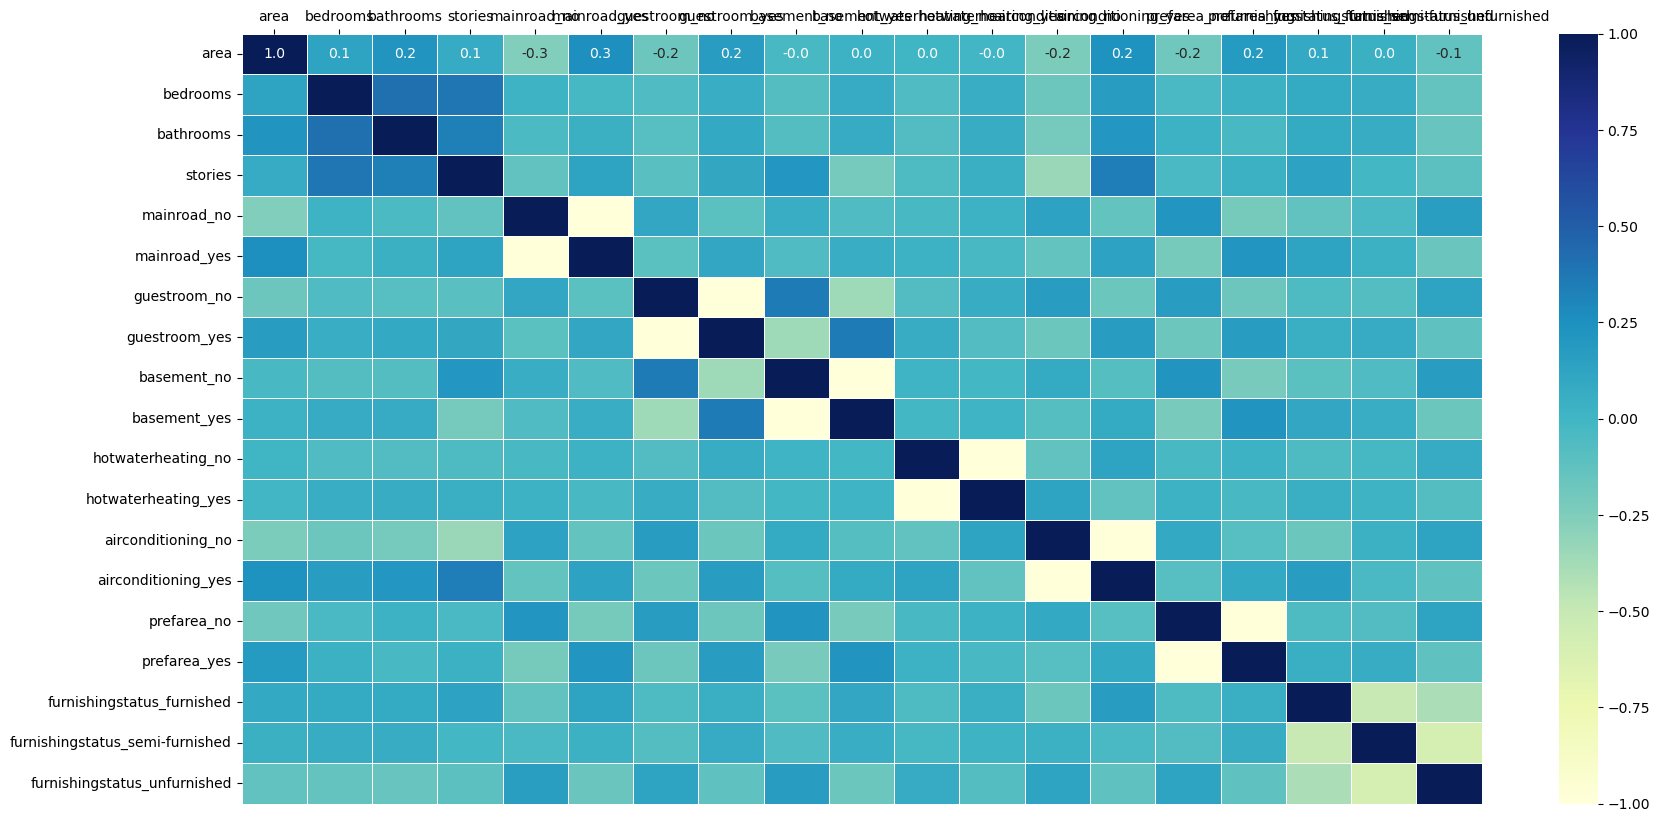

In [109]:
plt.figure(figsize = (20, 10))
ax=sns.heatmap(train[numerical+encoded_cols].corr(), cmap="YlGnBu",annot=True,linewidth=.5,fmt=".1f")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.show()